**Instructors**: Prof. Keith Chugg (chugg@usc.edu) & Prof. Antonio Ortega (aortega@usc.edu)

**Teaching Assistant**: Alexios Rustom (arustom@usc.edu)

**Book**: Watt, J., Borhani, R., & Katsaggelos, A. K. (2020). Machine learning refined: Foundations, algorithms, and applications. Cambridge University Press.

**Notebooks**: Written by Alexios Rustom (arustom@usc.edu)

# Data Loading Generation & Visualization

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

In [2]:
readDataPath = './readData/'
generatedDataPath = './generatedData/' #Please create a directory called "generatedData" to save all your outputs here

# Loading Data in Python

## Numpy <b>loadtxt</b> function
* built-in function in Numpy. Numpy is an acronym for ‘Numerical Python’. It is a library in python for supporting n-dimensional arrays. 
* Simple function for loading data files in Numpy from text files
* Useful for reading simple data from a file of the same type
* For more information about this function: [loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)

In [3]:
data = np.loadtxt(readDataPath + '2d_linregress_data.csv',delimiter = ',')
x = data[:-1,:] # up to last row (exclusive) of data & all columns
y = data[-1:,:] # last row of data & all columns
assert x.shape == y.shape, f'Shape mismatch between X and Y'

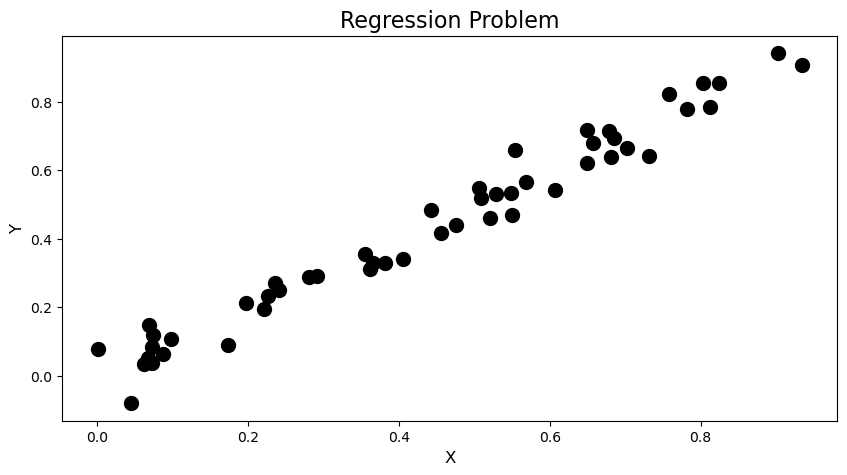

In [4]:
plt.figure(figsize=(10, 5))
plt.scatter(x,y,s=100,facecolors='k', edgecolors='k')
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.title('Regression Problem', fontsize=16)
plt.show()

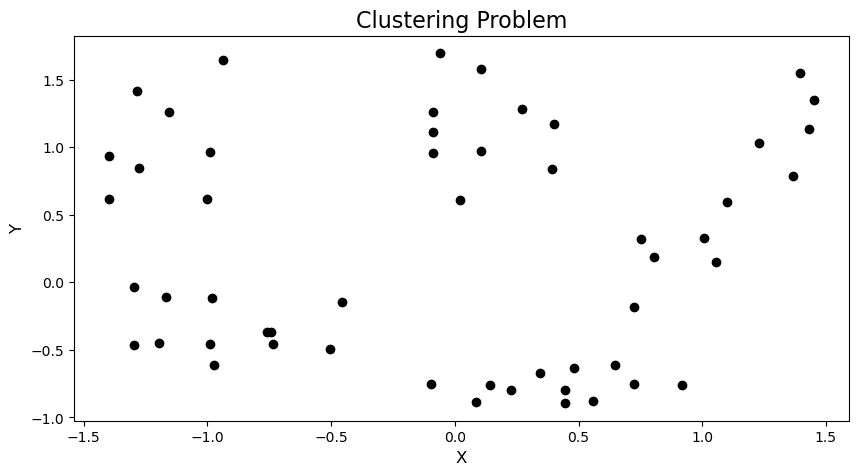

In [5]:
dataFile = readDataPath + '5cluster_2d_data.csv'
data = np.loadtxt(dataFile,delimiter = ',')
plt.figure(figsize=(10, 5))
plt.scatter(data[0],data[1],facecolors = 'k',edgecolors='k')
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.title('Clustering Problem', fontsize=16)
plt.show()

## Pandas <b>read_csv()</b> function
* Pandas is a very popular data manipulation library
* <b>read_csv()</b> is one of its very important and mature functions
* A **Comma Separated Values (CSV)** file is a plain text file that contains a list of data. These files are often used for exchanging data between different applications. These files may sometimes be called Character Separated Values or Comma Delimited files. They mostly use the comma character to separate (or delimit) data, but sometimes use other characters, like semicolons. The idea is that you can export complex data from one application to a CSV file, and then import the data in that CSV file into another application
* CSV format is the most common import and export format for spreadsheets and databases. They are plain-text files, so easier to import into a spreadsheet or another storage database, regardless of the specific software you're using. They are usually used to better organized large amounts of data.
* If human readability is important, this can be achieved fairly well using csv
* This can allow us to read any .csv file easily
* For more information about this function: [read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [6]:
data = pd.read_csv(readDataPath + 'svm_demo_data.csv', names=["X1", "X2", "Label"])

In [7]:
data.head(3)

,X1,X2,Label
0,0.339213,1.650444,-1.0
1,-0.156266,1.169979,-1.0
2,-0.058672,0.479312,-1.0


In [8]:
data.tail(3)

,X1,X2,Label
17,-1.042122,-0.819442,1.0
18,-0.419020,-0.871993,1.0
19,-0.358962,-1.127239,1.0


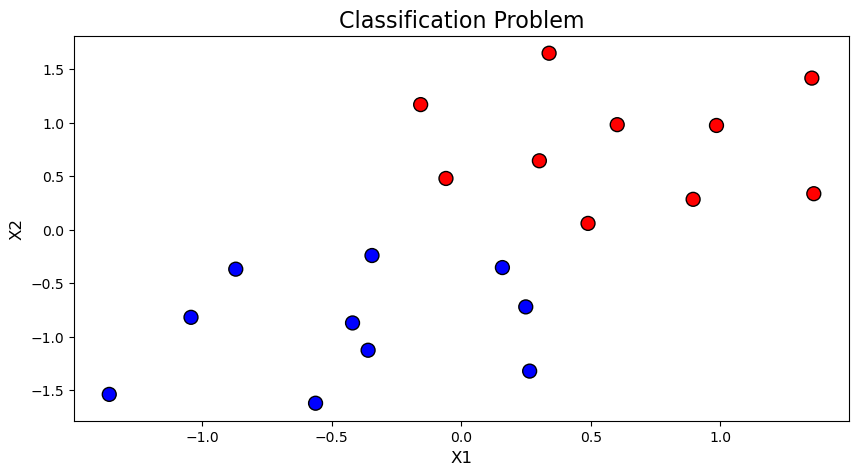

In [9]:
plt.figure(figsize=(10, 5))
col = np.where(data['Label']==1,'b','r')
plt.scatter(data['X1'],data['X2'],c= col, s=100,facecolors='k', edgecolors='k')
plt.xlabel('X1', fontsize = 12)
plt.ylabel('X2', fontsize = 12)
plt.title('Classification Problem', fontsize=16)
plt.show()

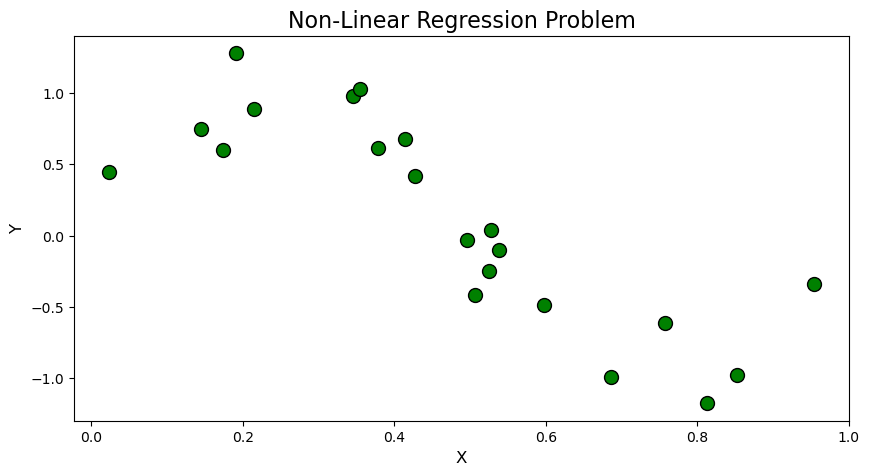

In [10]:
csvname = readDataPath + 'noisy_sin_sample.csv'
data = pd.read_csv(csvname, header = None)
data = data.T
data.columns = ['X', 'Y']
plt.figure(figsize=(10, 5))
plt.scatter(data["X"],data["Y"], s=100,facecolors='g', edgecolors='k')
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.title('Non-Linear Regression Problem', fontsize=16)
plt.show()

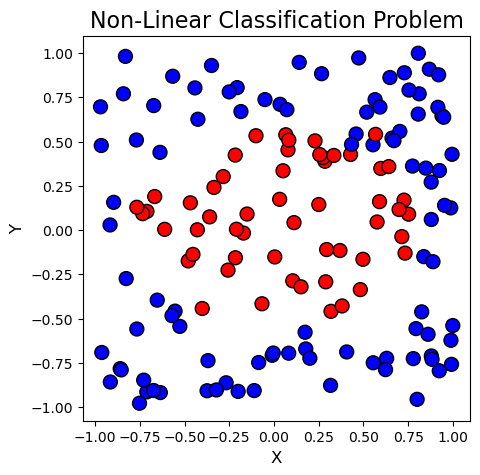

In [11]:
dataFileName = readDataPath + 'ellipse_2class_data.csv'
data = np.loadtxt(dataFileName,delimiter = ',')
data = pd.DataFrame(data)
data = data.T
data.columns=["X", "Y", "Label"]
plt.figure(figsize=(5, 5))
col = np.where(data["Label"]==1,'r','b')
plt.scatter(data["X"],data["Y"],s=100,c=col, edgecolors='k')
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.title('Non-Linear Classification Problem', fontsize=16)
plt.show()

## Loading Excel spreadsheet as pandas DataFrame
- Pandas is again is a very powerful and scalable tool for data analysis. It supports multiple file format as we might get the data in any format. Pandas also have support for excel file format.
- We first need to import Pandas and load excel file, and then parse excel file sheets as a Pandas dataframe.
- One can also read specific columns or sheets using the read_excel() method.

In [12]:
excel_file = pd.ExcelFile(readDataPath + "monthly_price.xlsx")

In [13]:
excel_file_sheets_names = excel_file.sheet_names
print('Last 5 Sheet names: ', excel_file_sheets_names[-5:])

Last 5 Sheet names:  ['Apr2021', 'May2021', 'Jun2021', 'Jul2021', 'Aug2021']


In [14]:
#create a dictionary containing a DataFrame for every sheet
dfs = {sheet_name: excel_file.parse(sheet_name) for sheet_name in excel_file_sheets_names}
dfs.keys()

dict_keys(['Nov2017', 'Dec2017', 'Jan2018', 'Feb2018', 'Mar2018', 'Apr2018', 'May2018', 'Jun2018', 'Jul2018', 'Aug2018', 'Sep2018', 'Oct2018', 'Nov2018', 'Dec2018', 'Jan2019', 'Feb2019', 'Mar2019', 'Apr2019', 'May2019', 'Jun2019', 'Jul2019', 'Aug2019', 'Sep2019', 'Oct2019', 'Nov2019', 'Dec2019', 'Jan2020', 'Feb2020', 'Mar2020', 'Apr2020', 'May2020', 'Jun2020', 'Jul2020', 'Aug2020', 'Sep2020', 'Oct2020', 'Nov2020', 'Dec2020', 'Jan2021', 'Feb2021', 'Mar2021', 'Apr2021', 'May2021', 'Jun2021', 'Jul2021', 'Aug2021'])

In [15]:
dfs['Jun2021'].head()

,SNo,Date,mmyyyy,Price,Open,High,Low,Vol.,Change %
0,1301,01Jun2021,Jun2021,362.39,353.63,364.16,340.56,4420000,2.45
1,1302,02Jun2021,Jun2021,401.12,362.39,417.41,351.19,5260000,10.69
2,1303,03Jun2021,Jun2021,427.59,401.13,432.58,391.83,5060000,6.60
3,1304,04Jun2021,Jun2021,390.97,428.47,428.71,366.56,5920000,-8.56
4,1305,05Jun2021,Jun2021,390.09,390.68,425.57,374.62,4790000,-0.23


In [16]:
dfs['Jun2021'].tail()

,SNo,Date,mmyyyy,Price,Open,High,Low,Vol.,Change %
25,1326,26Jun2021,Jun2021,279.45,281.15,290.05,264.47,2630000,-0.60
26,1327,27Jun2021,Jun2021,290.86,279.45,291.08,270.00,1790000,4.08
27,1328,28Jun2021,Jun2021,289.83,290.87,298.93,283.91,2160000,-0.35
28,1329,29Jun2021,Jun2021,299.88,289.85,315.04,289.27,2430000,3.47
29,1330,30Jun2021,Jun2021,303.25,299.88,304.71,281.84,2360000,1.12


In [17]:
#Separate year/string from each of the sheet names
years = [year[3:] for year in excel_file_sheets_names]
years = list(dict.fromkeys(years)) #only unique keys
print('Years under study: ',years)

Years under study:  ['2017', '2018', '2019', '2020', '2021']


In [18]:
#Read all the sheets from the said file and create a separate excel for each year
for year in years:
    # pd.ExcelWriter Class for writing DataFrame objects into excel sheets.
    output_file = generatedDataPath+ "/price_list_"+year+".xlsx"
    if os.path.exists(output_file):
        os.remove(output_file)
    excelWriter = pd.ExcelWriter(output_file,engine="xlsxwriter")
    for sheet in excel_file_sheets_names: #This will add all months of the same year in the same excel file "/price_list_"+year+".xlsx". Each month corresponds to a sheet in this file.
        if sheet.endswith(year):
            df = pd.read_excel(readDataPath+ "/monthly_price.xlsx",sheet_name=sheet)
            df.to_excel(excelWriter,sheet_name=sheet,index=False)
    excelWriter.save()

/var/folders/lk/snv_84nd4dj88h4xz4kcy5wh0000gn/T/ipykernel_5453/1291019595.py:12: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excelWriter.save()
/var/folders/lk/snv_84nd4dj88h4xz4kcy5wh0000gn/T/ipykernel_5453/1291019595.py:12: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excelWriter.save()
/var/folders/lk/snv_84nd4dj88h4xz4kcy5wh0000gn/T/ipykernel_5453/1291019595.py:12: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excelWriter.save()
/var/folders/lk/snv_84nd4dj88h4xz4kcy5wh0000gn/T/ipykernel_5453/1291019595.py:12: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excelWriter.save()
/var/folders/lk/snv_84nd4dj88h4xz4kcy5wh0000gn/T/ipykernel_5453/1291019595.py:12: Future

## <b>Pickle</b> - Python Object Serialization
* Suppose you spent working on processing many data sources to build an elaborate, highly structured data object (example: dictionary of English words with their frequency counts, translation into other languages, etc.) and want to use this object for future uses. 
* You could think of writing the data object out to a text file, but this is not optimal since once it is written as a text file, the next time you read it, you will have to parse the text and process it back to your original data structure. Pickling and unpickling allow you to load your Python data object as itself for future uses
* Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
* Another use for pickling is if you need to transmit this dictionary over a network (perhaps with sockets or something.) You first need to convert it into a character stream, then you can send it over a socket connection 
* <b>Pickle</b> module implements binary protocols for serializing and de-serializing a Python object Structure
* Serialization refers to the process of converting an object in memory to a byte stream that can be stored on a disk or sent over a network. De-serializing referes to the process of converting a byte stream back into an object hierarchy
* The <b>Pickle</b> data format uses a relatively compact binary representation
* To serialize an object hierarchy, simply call <b>dump</b>. To de-serialize, call <b>load()</b>
* For more information it: [pickle](https://docs.python.org/3/library/pickle.html)

### Security Concerns With the Python pickle Module
- Pickled data is binary, so it gets run immediately upon using *pickle.load*. Pickle executes arbitrary code and is a security issue 
- If loading from an untrusted source, the file could contain executable instructions to achieve things like man-in-the-middle attacks over a network, among other things
- Never unpickle data that comes from an untrusted source or is transmitted over an insecure network
- Pure pickled data may be faster to save/load if you don't follow with compression, and hence have a larger file size, but numpy load/save may be more secure

In [19]:
import pickle

In [20]:
data = np.loadtxt(readDataPath + 'regression_outliers.csv',delimiter = ',')
#open a file where you want to store data
file = open(generatedDataPath + '/Regression_outliers.pkl','wb')
# dump information to that file
pickle.dump(data, file)
# close the file
file.close()

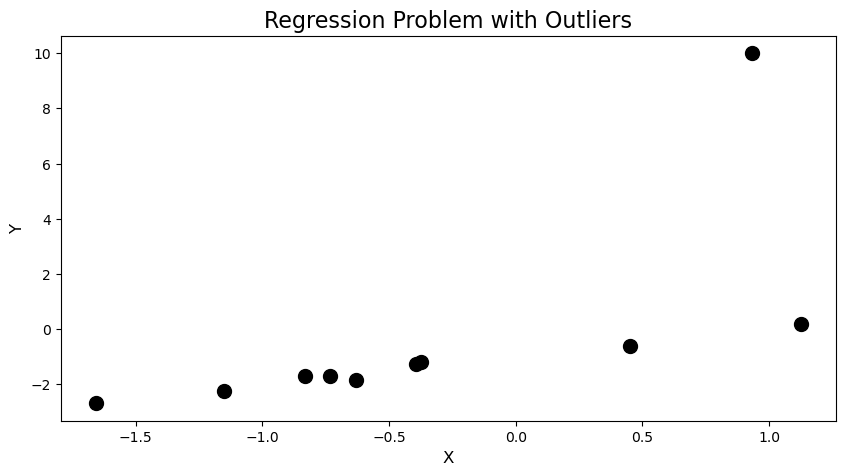

In [21]:
file = open(generatedDataPath + 'Regression_outliers.pkl','rb')
data = pickle.load(file)
# close the file
file.close()
x = data[:-1,:]
y = data[-1:,:]

plt.figure(figsize=(10, 5))
plt.scatter(x,y,s=100,facecolors='k', edgecolors='k')
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.title('Regression Problem with Outliers', fontsize=16)
plt.show()

## <b>npy</b> & <b>savez</b>


 ### NPY Format
 - A simple format for saving numpy arrays to disk with the full information about them.
 - The .npy format is the standard binary file format in NumPy for persisting a single arbitrary NumPy array on disk. 
 - The format stores all of the shape and dtype information necessary to reconstruct the array correctly even on another machine with a different architecture. 
 - It can represent all NumPy arrays including nested record arrays and object arrays.
 - If you are only saving numpy data and no other python data, and security is a greater priority over file size and speed, then numpy might be the way to go. Use *numpy.save* and set *allow_pickle=False* to disable saving object arrays using Python pickles for security purposes.
 - For more information it: [.npy loading](https://numpy.org/doc/stable/reference/generated/numpy.load.html)


 ### savez 
- <b>savez</b> (<b>np.savez_compressed</b>) is a numpy function that saves several variables into a single file in an uncompressed (compressed)<b>.npz</b> format. This format is a zipped archive of files named after the variables they contain.
- It saves several arrays into a .npz archive. Each file in the archive contains one variable in <b>.npy</b> format
- In general, each argument is passed with a keywork which corresponds to the variable names
- For more information it: [np.savez](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)

In [22]:
#np.loadtxt
data_Class3 = np.loadtxt(readDataPath + '3class_data.csv',delimiter = ',')
data_Class4 = np.loadtxt(readDataPath + '4class_data.csv',delimiter = ',')

In [23]:
outfile = generatedDataPath+ 'classification3&4.npz'
np.savez_compressed(outfile, data_Class3=data_Class3,data_Class4=data_Class4)

In [24]:
#Load npz file
npzfile = np.load(outfile)
#Print content of npz files
npzfile.files

['data_Class3', 'data_Class4']

In [25]:
#store content in corresponding arrays
loaded_data_Class3 = npzfile['data_Class3']
loaded_data_Class4 = npzfile['data_Class4']

In [26]:
#Convert arrays into dataframes
df_Class3 = pd.DataFrame({'X1': data_Class3[0],'X2': data_Class3[1], 'Label': data_Class3[2]})
df_Class4  = pd.DataFrame({'X1': data_Class4[0],'X2': data_Class4[1], 'Label': data_Class4[2]})

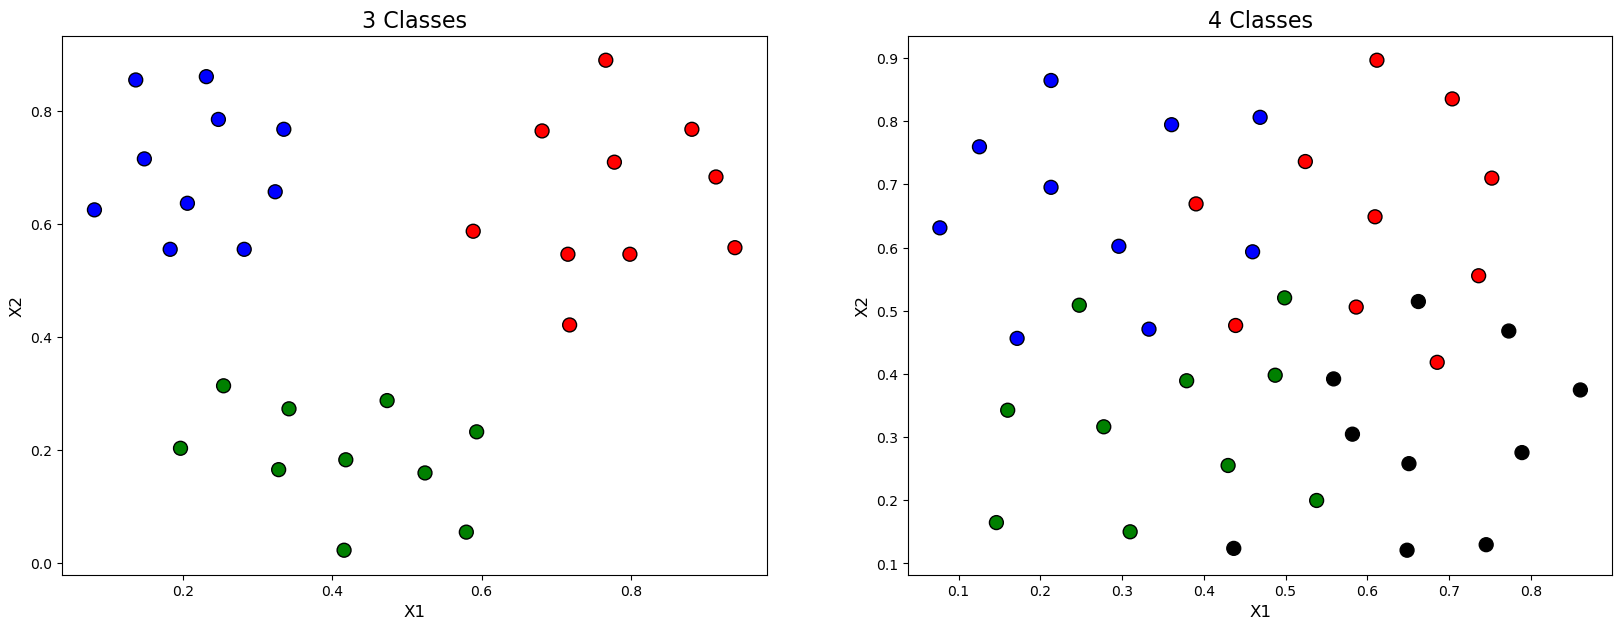

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
col_3C = np.where(df_Class3['Label']==0,'b',np.where(df_Class3['Label']==1,'r',np.where(df_Class3['Label']==2,'g', 'k')))
ax1.scatter(df_Class3['X1'],df_Class3['X2'],c= col_3C, s=100, edgecolors='k')
ax1.set_title('3 Classes',fontsize=16)
ax1.set_xlabel('X1', fontsize = 12)
ax1.set_ylabel('X2', fontsize = 12)
col_4C = np.where(df_Class4['Label']==0,'b',np.where(df_Class4['Label']==1,'r',np.where(df_Class4['Label']==2,'g', 'k')))
ax2.scatter(df_Class4['X1'],df_Class4['X2'],c= col_4C, s=100, edgecolors='k')
ax2.set_title('4 Classes', fontsize=16)
ax2.set_xlabel('X1', fontsize = 12)
ax2.set_ylabel('X2', fontsize = 12)
plt.show()

## <b>HD5</b> format

- Hierarchical Data Format (HDF) is a set of file formats (HDF4, HDF5) designed to store and organize large amounts of data.
- An HDF5 file is a container for two kinds of objects: datasets, which are array-like collections of data, and groups, which are folder-like containers that hold datasets and other groups. The most fundamental thing to remember when using h5py is: **Groups work like dictionaries, and datasets work like NumPy arrays**
- If your data is truly large and complex, hdf5 format via h5py is good.
- Remember to install it in your environment using *conda install h5py* or *pip install h5py*
- For more information, refer to [H5 Guide](https://docs.h5py.org/en/stable/quick.html#quick)

#### Other useful features of h5py
1. Groups. They behave like python dictionaries. (http://docs.h5py.org/en/stable/high/group.html)
2. Arbitrary variable length data storage, useful for data like speech signal (http://docs.h5py.org/en/stable/special.html?highlight=variable%20length)
3. Resizable data storage. Useful for creating very big datasets. (http://docs.h5py.org/en/stable/high/dataset.html)
4. For very big dataset, if you need to load only a subpart e.g., one row might denote one image data in your dataset, then hdf5 loading saves space

In [28]:
import h5py

In [29]:
n1 = 1000; n2 = 100
mu1 = mu2 = 0; sigma1 = 1; sigma2 = 3. 
x1 = sigma1*np.random.randn(n1)+mu1
x2 = sigma2*np.random.randn(n2)+mu2

In [30]:
x1s = np.sort(x1)
x1sr = x1s.reshape(10,100)

In [31]:
hd5_file = generatedDataPath+ "demoHD5file.hd5"
if os.path.exists(hd5_file):
    os.remove(hd5_file)
    print(hd5_file + " is deleted")
else:
    print(hd5_file + " does not exist")

./generatedData/demoHD5file.hd5 does not exist


In [32]:
with h5py.File(hd5_file, "w") as f:
    f.create_dataset("x1", data=x1sr)
    f.create_dataset("x2", data=x2)

In [33]:
# Load hdf5 file in 'r' mode
f = h5py.File(hd5_file, 'r')
print('keys of the dataset: ', list(f.keys())) #useful for seeing the data set name/key
x1_read = f['x1']
print('dataset: ', x1_read) 
print('dataset type:', type(x1_read)) #note: this is hdf5 dataset, not a numpy array
print('dataset slicing:', x1_read[0,10:15]) #but it supports slicing etc., useful for loading a part of a very big dataset
x1_read_full = x1_read[:] #get the full numpy array
np.testing.assert_array_equal(x1_read_full,x1sr) #check that arrays match
f.close() #Remember to close file

keys of the dataset:  ['x1', 'x2']
dataset:  <HDF5 dataset "x1": shape (10, 100), type "<f8">
dataset type: <class 'h5py._hl.dataset.Dataset'>
dataset slicing: [-2.06182842 -2.03733839 -1.99011787 -1.98471357 -1.97195   ]


# Comparison: Speed & File Size of to_csv(), np.save(), HDF5, and to_pickle Functions

In [34]:
random_data = np.random.randint(low=0, high = 10000000, size=(10000000,3))
#random_data = np.random.standard_normal(size=1000000)
data = pd.DataFrame(data={'col1': random_data[:,0], 'col2': random_data[:,1], 'col3':random_data[:,2]})
#t = pd.date_range(start='2021/01/01', periods=random_data.shape[0], freq='S')
#data = pd.DataFrame(data={'datetime': t, 'value': random_data})

## 1. to_csv()

In [35]:
myDataPath = generatedDataPath+'my_data.csv'

In [36]:
%%timeit 
data.to_csv(myDataPath, index=False)

17.2 s ± 945 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
%%timeit 
a = pd.read_csv(myDataPath)

2.45 s ± 67 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
print(f"File size is {os.path.getsize(myDataPath)/1024**2:.0f} MB.")

File size is 226 MB.


## 2. np.save() & np.load() to .npy

In [39]:
myDataPath = generatedDataPath+'my_data.npy'

In [40]:
%%timeit 
np.save(myDataPath, data.to_numpy())

393 ms ± 98.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
%%timeit 
a = np.load(myDataPath, allow_pickle=True)

87.6 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [42]:
a = np.load(myDataPath, allow_pickle=True)

In [43]:
%%timeit 
#When we read it, it will be a NumPy array and if we want to use it as a Pandas DataFrame we need to convert it.
b = pd.DataFrame(data=a, columns=['col1', 'col2','col3'])

75.9 µs ± 542 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [44]:
print(f"File size is {os.path.getsize(myDataPath)/1024**2:.0f} MB.")

File size is 229 MB.


## 3. np.savez & np.load() to .npz

In [45]:
myDataPath = generatedDataPath+'my_data.npz'

In [46]:
%%timeit 
np.savez(myDataPath, data = data.to_numpy())

222 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
%%timeit 
a = np.load(myDataPath, allow_pickle=True)

58.7 µs ± 401 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [48]:
a = np.load(myDataPath, allow_pickle=True)

In [49]:
%timeit b = a['data']

222 ms ± 5.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
%%timeit 
b = pd.DataFrame(data=a['data'], columns=['col1', 'col2', 'col3'])

232 ms ± 12.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [51]:
print(f"File size is {os.path.getsize(myDataPath)/1024**2:.0f} MB.")

File size is 229 MB.


## 4. HDF5

In [52]:
myDataPath = generatedDataPath+'my_data.hdf5'

In [53]:
%%timeit 
with h5py.File(myDataPath, 'w') as hf:
    hf.create_dataset('dataset', data=data)

355 ms ± 64.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [54]:
%%timeit
with h5py.File(myDataPath, 'r') as hf:
    a = hf['dataset'][:]

85.8 ms ± 1.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
%%timeit
with h5py.File(myDataPath, 'r') as hf:
    a = hf['dataset'][0]

702 µs ± 2.97 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [56]:
print(f"File size is {os.path.getsize(myDataPath)/1024**2:.0f} MB.")

File size is 229 MB.


## 5. Pickle

In [57]:
myDataPath = generatedDataPath+'myData.pkl'

In [58]:
%timeit data.to_pickle(myDataPath)

408 ms ± 122 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [59]:
%timeit a = pd.read_pickle(myDataPath)

94.7 ms ± 6.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [60]:
print(f"File size is {os.path.getsize(myDataPath)/1024**2:.0f} MB.")

File size is 229 MB.


## Summary
#### The results that you obtained may be different from the ones reported in this table

| Type | Write (seconds) | Read (seconds) | fileSize (MB) |
| --- | --- | --- | --- |
| csv | 17.2 | 2.45 | 226 |
| npy | 0.393 | 0.0876 | 229 |
| npz | 0.222 | 0.454| 229 |
| h5 | 0.355 | 0.0858 (or 0.0.000702 - 1 column)| 229 |
| pkl | 0.408 | 0.0947| 229 |


# Data Generation

In [61]:
from sklearn.datasets import make_circles

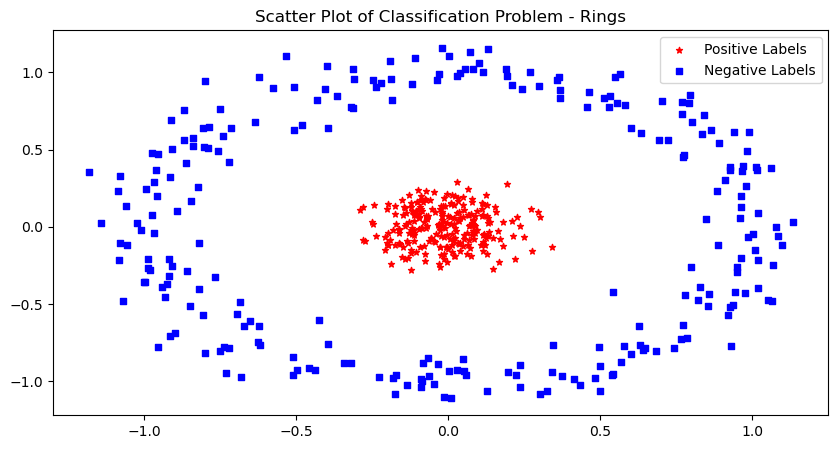

In [62]:
title = ('Scatter Plot of Classification Problem - Rings')
X, label = make_circles(n_samples=500, factor=0.1, noise=0.1)
fig = plt.figure(figsize=(10,5))
index_Y_negative = label == 0
index_Y_positive = label == 1
plt.scatter(X[index_Y_positive, 0], X[index_Y_positive, 1], c="red", s=20, marker = '*', label = 'Positive Labels')
plt.scatter(X[index_Y_negative, 0], X[index_Y_negative, 1], c="blue", s=20, marker = 's', label = 'Negative Labels')
plt.legend()
plt.title(title)
plt.show()

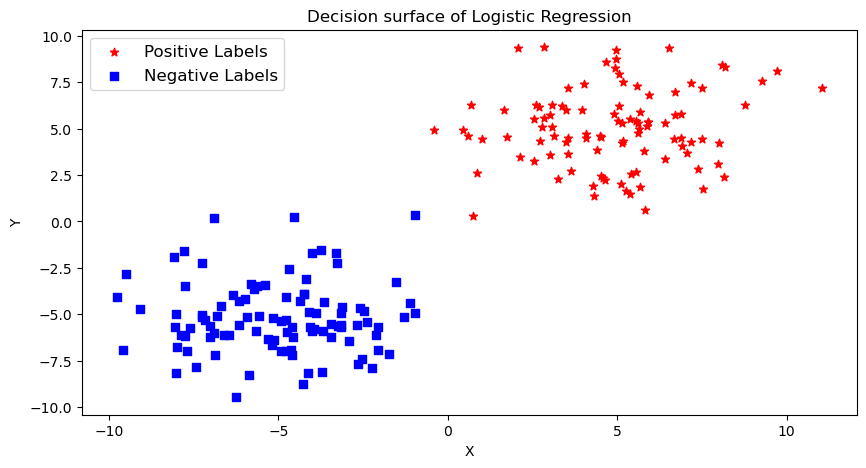

In [63]:
title = ('Decision surface of Logistic Regression')
n_samples = 200
center_1 = [-5, -5]
center_2 = [5, 5]
sigma_1 = 2
sigma_2 = 2
Xneg = np.random.normal(center_1, sigma_1, (n_samples//2,2))
Xpos = np.random.normal(center_2, sigma_2, (n_samples//2,2))
X = np.concatenate((Xneg,Xpos),axis=0) 
Y = np.ones(n_samples)
Y[0:(n_samples//2)] = -1

fig = plt.figure(figsize=(10,5))
plt.scatter(Xpos[:,0], Xpos[:,1], marker = '*', color = 'red')
plt.scatter(Xneg[:,0], Xneg[:,1], marker = 's', color = 'blue')
plt.ylabel(r'Y')
plt.xlabel(r'X')
plt.title(title)
plt.legend(['Positive Labels', 'Negative Labels'],fontsize=12)
plt.show()